## Topic 3: Matplotlib for Univariate Data Visualization in Python

This tutorial includes the following methods and operations:
- Data Checking and Cleaning
- Data Mining / Inferential Data Analysis
- Predictive Modeling


In [2]:
import os                           
import numpy as np  # arrays and matrix math
import pandas as pd #for tabular data
import matplotlib.pyplot as plt# plotting
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)#controlling of axes ticks
plt.rc('axes', axisbelow=True)# setting axes and grids in the background for all plots
from matplotlib.patches import Rectangle # drawing shapes on plots

### Loading The Dataset

In [4]:
# reading data from github
table = pd.read_csv('https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/spatial_nonlinear_MV_facies_v1.csv')
# removing the first feature (column)
table = table.iloc[:, 1:]
print('The tabular data is a ' + str(type(table)))
table.head(n=3)

The tabular data is a <class 'pandas.core.frame.DataFrame'>


,Y,Porosity,Perm,AI,Facies
0,10.006391,7.791849,332.802662,4114.121592,1
1,160.265186,16.708829,505.072608,3820.596087,1
2,775.834642,12.430224,404.367985,4180.556194,1


### Extracting the Feature from the Table

In [5]:
# extracting porosity feature a a 1D ndarray
por = table['Porosity'].values
print('The por is a ' + str(type(por)) + ' of shape ' + str(por.shape) + '.')

The por is a <class 'numpy.ndarray'> of shape (457,).


### Plotting Histograms


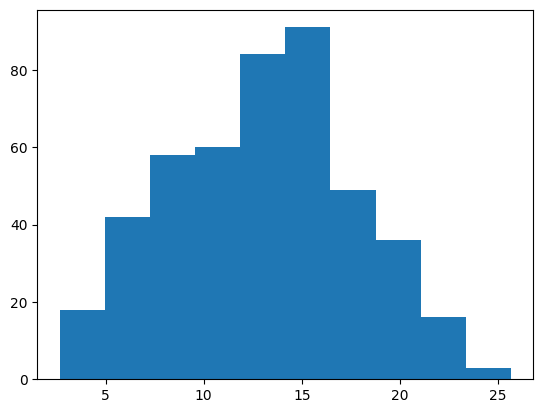

In [6]:
plt.hist(x=table['Porosity'].values)
plt.show()